# Part-1

In [1428]:
import sklearn
from sklearn import datasets
import numpy as np

In [1429]:
import pandas as pd
pd.set_option('display.max_columns', None)
market_data = pd.read_csv('HOMEWORK_1_DATASET_DIRECT_MARKETING.csv')

In [1430]:
market_data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [1431]:
market_data.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000
std,30616.314826,1.05107,6.622895,961.068613
min,10100.000000,0.00000,6.000000,38.000000
25%,29975.000000,0.00000,6.000000,488.250000
50%,53700.000000,1.00000,12.000000,962.000000
75%,77025.000000,2.00000,18.000000,1688.500000
max,168800.000000,3.00000,24.000000,6217.000000


In [1432]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [1433]:
df = pd.DataFrame()
df['x'] = market_data['Salary']
df['y'] = market_data['AmountSpent']
df.head()

,x,y
0,47500,755
1,63600,1318
2,13500,296
3,85600,2436
4,68400,1304


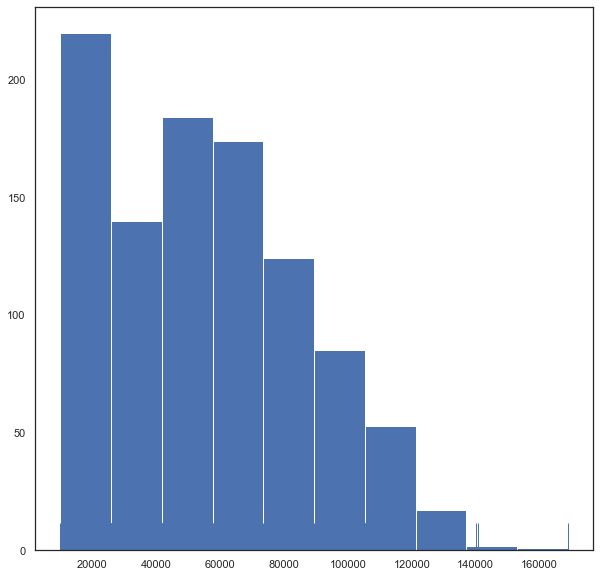

In [1434]:
plt.hist(df.x, alpha=1)
sns.rugplot(df.x);

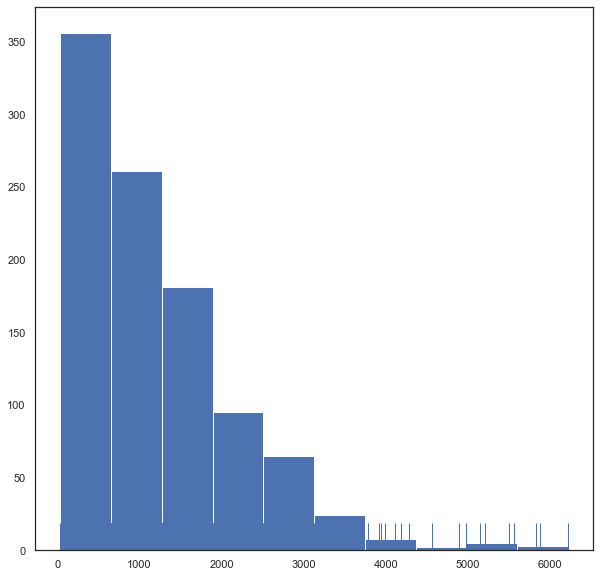

In [1435]:
plt.hist(df.y, alpha=1)
sns.rugplot(df.y);

Salary and AmountSpent are Right-Skewed

To normalise continuous variables we have to square them, take a square root of log to transform them.

In [1436]:
market_data['Salary'] = np.log(market_data[['Salary']])
market_data['AmountSpent'] = market_data[['AmountSpent']]**(1/3)

(array([ 44.,  76.,  78.,  56.,  94., 170., 191., 161., 121.,   9.]),
 array([ 9.2202907 ,  9.50190862,  9.78352653, 10.06514445, 10.34676237,
        10.62838028, 10.9099982 , 11.19161611, 11.47323403, 11.75485195,
        12.03646986]),
 <a list of 10 Patch objects>)

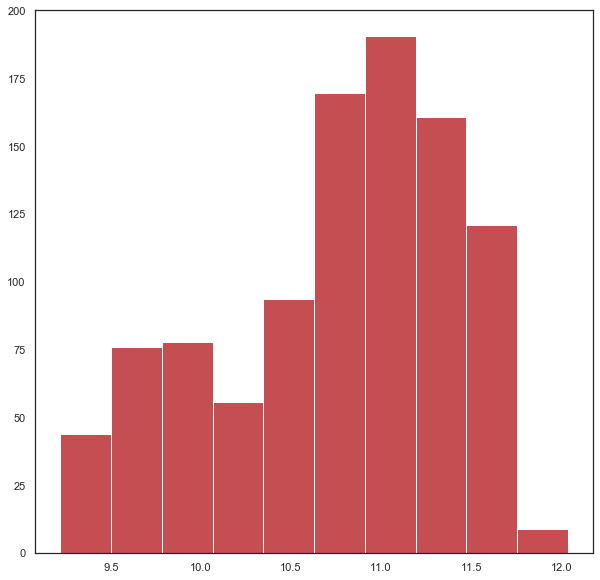

In [1437]:
plt.hist(market_data['Salary'],
         bins = 10,
         alpha=1, 
         color='r',
        label = 'Salary_sqroot')

(array([ 14.,  95., 141., 181., 190., 179., 116.,  63.,  12.,   9.]),
 array([ 3.36197541,  4.86454595,  6.36711648,  7.86968702,  9.37225756,
        10.8748281 , 12.37739864, 13.87996917, 15.38253971, 16.88511025,
        18.38768079]),
 <a list of 10 Patch objects>)

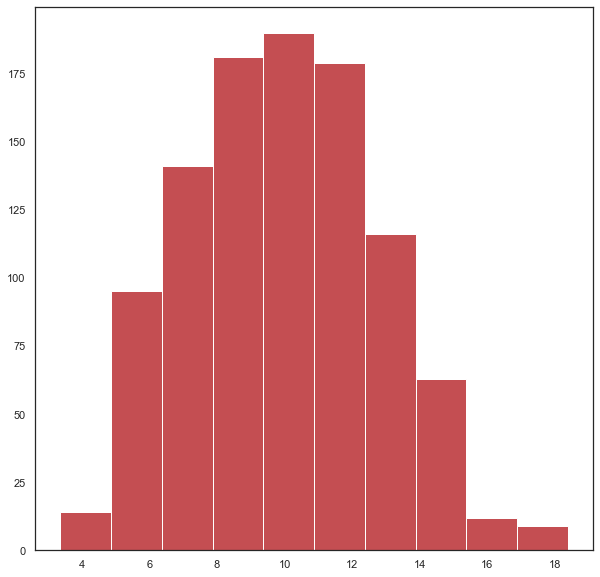

In [1438]:
plt.hist(market_data['AmountSpent'],
         bins = 10,
         alpha=1, 
         color='r',
        label = 'AmountSpent_sqroot')

In [1439]:
market_data.isnull().sum(axis = 0)

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [1440]:
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(missing_values='NaN', strategy='median', axis=0)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [1441]:
market_data.dtypes

Age             object
Gender          object
OwnHome         object
Married         object
Location        object
Salary         float64
Children         int64
History         object
Catalogs         int64
AmountSpent    float64
dtype: object

In [1442]:
market_data['History'] = market_data['History'].fillna(method ='ffill')

In [1443]:
market_data.isnull().sum(axis = 0)

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
dtype: int64

In [1444]:
def age_to_numeric(x):
    if x=='Young':
        return 1
    if x=='Middle':
        return 2
    if x=='Old':
        return 3

In [1445]:
def gender_to_numeric(x):
    if x=='Male':
        return 1
    if x=='Female':
        return 2

def ownhome_to_numeric(x):
    if x=='Rent':
        return 1
    if x=='Own':
        return 2

def married_to_numeric(x):
    if x=='Single':
        return 1
    if x=='Married':
        return 2

def location_to_numeric(x):
    if x=='Far':
        return 1
    if x=='Close':
        return 2

def history_to_numeric(x):
    if x=='High':
        return 1
    if x=='Low':
        return 2
    if x=='Medium':
        return 3

In [1446]:
market_data['Age'] = market_data['Age'].apply(age_to_numeric)
market_data['Gender'] = market_data['Gender'].apply(gender_to_numeric)
market_data['OwnHome'] = market_data['OwnHome'].apply(ownhome_to_numeric)
market_data['Location'] = market_data['Location'].apply(location_to_numeric)
market_data['Married'] = market_data['Married'].apply(married_to_numeric)
market_data['History'] = market_data['History'].apply(history_to_numeric)
market_data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,3,2,2,1,1,10.768485,0,1,6,9.105748
1,2,1,1,1,2,11.060369,0,1,6,10.964070
2,1,2,1,1,2,9.510445,0,2,18,6.664444
3,2,1,2,2,2,11.357441,1,1,18,13.455270
4,2,2,2,1,2,11.133128,0,1,12,10.925111


In [1447]:
market_data_input = market_data[['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children', 'History', 'Catalogs']]

target = market_data['AmountSpent']

In [1448]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(market_data_input, 
                                                    target, 
                                                    test_size=0.30, 
                                                    random_state=1)

In [1449]:
from sklearn import linear_model

In [1450]:
ols = linear_model.LinearRegression()

In [1451]:
model = ols.fit(x_train, y_train)

In [1452]:
x_train.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
731,3,1,1,1,2,10.448715,0,3,24
716,2,1,1,1,1,10.563595,1,3,18
640,2,2,1,1,1,10.348173,3,1,24
804,2,1,2,2,2,10.661954,0,3,6
737,1,2,2,1,1,9.994242,2,2,24


In [1453]:
model.score(x_train, y_train)

0.8205434761297923

In [1454]:
model.score(x_test, y_test)

0.805641241341865

In [1455]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

In [1456]:
regr = Lasso(alpha=0.01)

In [1457]:
lasso_model = regr.fit(x_train_std, y_train)

In [1458]:
lasso_model

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1459]:
print(lasso_model.coef_, lasso_model.intercept_)

[-0.06925793  0.00744462  0.06070721  0.04215457 -0.56301395  1.86109042
 -0.75096421 -0.26799622  0.81059264] 9.943598734096902


In [1460]:
from sklearn.linear_model import LassoCV

In [1461]:
lasso_cv = LassoCV(alphas = [0.01, 0.0222, 0.05, 1, 7, 9])

In [1462]:
model_cv = lasso_cv.fit(x_train_std, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [1463]:
model_cv.alpha_

0.01

In [1464]:
lasso_cv.score(x_train_std,y_train)

0.8203792676000592

In [1465]:
lasso_cv.score(x_test_std,y_test)

0.8071788171292922

In [1466]:
from sklearn.linear_model import RidgeCV

In [1467]:
ridge_cv = RidgeCV(alphas = [0.026,0.1,0.3334,0.8,1.2,1.5,3,6,9])

In [1468]:
ridge_model_cv = ridge_cv.fit(x_train_std, y_train)

In [1469]:
ridge_model_cv.alpha_

1.5

In [1470]:
ridge_cv.score(x_train_std,y_train)

0.8205366273800277

In [1471]:
ridge_cv.score(x_test_std,y_test)

0.806321734508114

In [1472]:
test_predict = model_cv.predict(x_test_std)
train_predict = model_cv.predict(x_train_std)

In [1473]:
train_residuals = y_train - train_predict
test_residuals = y_test - test_predict

In [1474]:
train_residuals.shape

(700,)

In [1475]:
y_train.shape

(700,)

In [1476]:
train_predict.shape

(700,)

In [1477]:
import matplotlib.pyplot as plt
import seaborn as sns

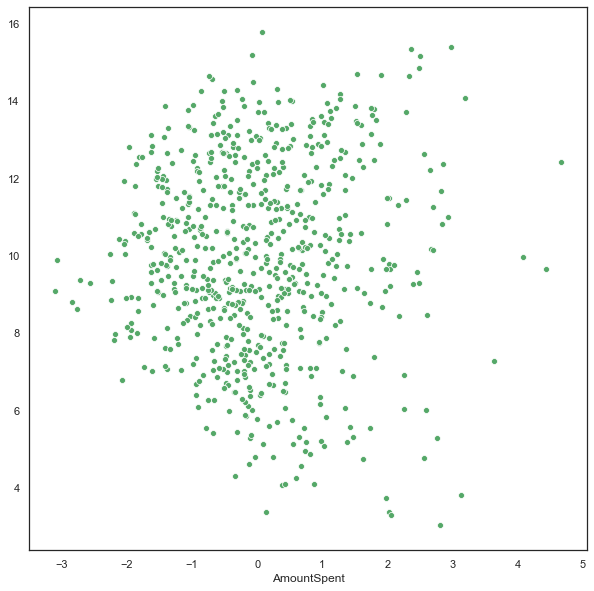

In [1478]:
sns.scatterplot(train_residuals,train_predict, color='g')
plt.show()

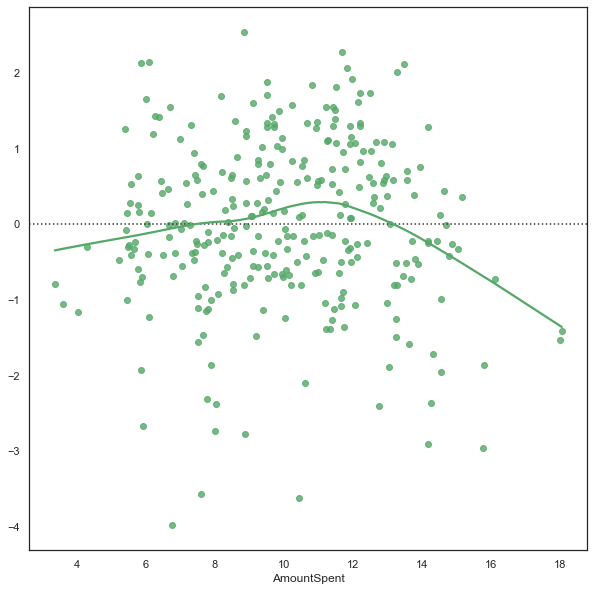

In [1479]:
sns.residplot(y_test,test_predict, lowess=True, color='g')
plt.show()

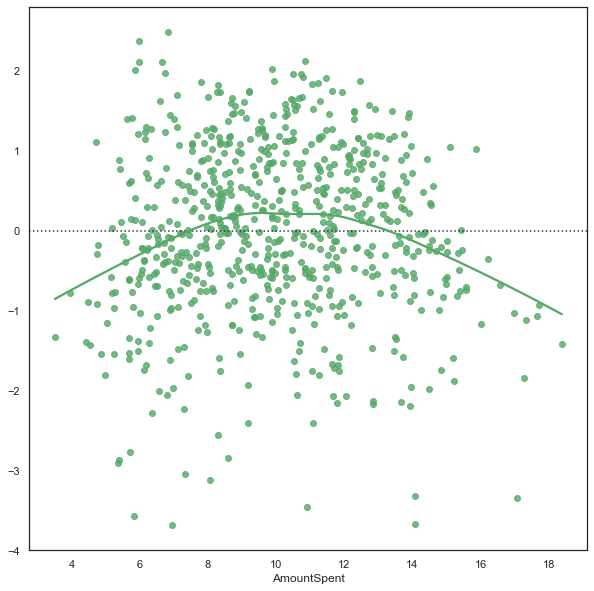

In [1480]:
sns.residplot(y_train,train_predict, lowess=True, color='g')
plt.show()

# Second Part

In [1481]:
flight_data = pd.read_csv('flight_delays.txt')

In [1482]:
flight_data.head()

,Unnamed: 0,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,2,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,3,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,4,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,5,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


In [1483]:
flight_data.describe()

,Unnamed: 0,schedtime,deptime,distance,flightnumber,weather,dayweek,daymonth
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1101.000000,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,635.518292,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,1.000000,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,551.000000,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1101.000000,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1651.000000,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2201.000000,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [1484]:
flight_data['ID'] = flight_data['Unnamed: 0']
flight_data = flight_data.drop(columns=['Unnamed: 0'])

In [1485]:
flight_data.groupby('delay')['ID'].nunique()

delay
delayed     428
ontime     1773
Name: ID, dtype: int64

In [1486]:
balance_delayed = 428/(428+1773)
balance_delayed

0.19445706497046797

In [1487]:
balance_ontime = 1773/(428+1773)
balance_delayed

0.19445706497046797

In [1488]:
def carrier_to_numeric(x):
    if x=='OH':
        return 1
    if x=='DH':
        return 2
    if x=='DL':
        return 3
    if x=='MQ':
        return 4
    if x=='UA':
        return 5
    if x=='US':
        return 6
    if x=='RU':
        return 7
    if x=='CO':
        return 8


def origin_to_numeric(x):
    if x=='BWI':
        return 1
    if x=='DCA':
        return 2
    if x=='IAD':
        return 3

def dest_to_numeric(x):
    if x=='JFK':
        return 1
    if x=='LJA':
        return 2
    if x=='EWR':
        return 3

def delay_to_numeric(x):
    if x=='ontime':
        return 0
    if x=='delayed':
        return 1

In [1489]:
flight_data['carrier'] = flight_data['carrier'].apply(carrier_to_numeric)
flight_data['origin'] = flight_data['origin'].apply(origin_to_numeric)
flight_data['dest'] = flight_data['dest'].apply(dest_to_numeric)
flight_data['delay'] = flight_data['delay'].apply(delay_to_numeric)
flight_data['dest'] = flight_data['dest'].fillna(method ='ffill')

In [1490]:
flight_data.head()

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay,ID
0,1455,1,1455,1.0,184,1/1/2004,5935,1,0,4,1,N940CA,0,1
1,1640,2,1640,1.0,213,1/1/2004,6155,2,0,4,1,N405FJ,0,2
2,1245,2,1245,1.0,229,1/1/2004,7208,3,0,4,1,N695BR,0,3
3,1715,2,1709,1.0,229,1/1/2004,7215,3,0,4,1,N662BR,0,4
4,1039,2,1035,1.0,229,1/1/2004,7792,3,0,4,1,N698BR,0,5


In [1491]:
flight_data.describe()

,schedtime,carrier,deptime,dest,distance,flightnumber,origin,weather,dayweek,daymonth,delay,ID
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,4.390277,1369.298955,1.607905,211.871422,3815.086324,2.245797,0.014539,3.905498,16.024989,0.194457,1101.000000
std,432.697149,2.061525,442.462754,0.920134,13.316815,2409.750224,0.563279,0.119725,1.903149,8.677390,0.395872,635.518292
min,600.000000,1.000000,10.000000,1.000000,169.000000,746.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1000.000000,2.000000,1004.000000,1.000000,213.000000,2156.000000,2.000000,0.000000,2.000000,8.000000,0.000000,551.000000
50%,1455.000000,4.000000,1450.000000,1.000000,214.000000,2385.000000,2.000000,0.000000,4.000000,16.000000,0.000000,1101.000000
75%,1710.000000,6.000000,1709.000000,3.000000,214.000000,6155.000000,3.000000,0.000000,5.000000,23.000000,0.000000,1651.000000
max,2130.000000,8.000000,2330.000000,3.000000,229.000000,7924.000000,3.000000,1.000000,7.000000,31.000000,1.000000,2201.000000


In [1492]:
flight_data.isnull().sum(axis=0)

schedtime       0
carrier         0
deptime         0
dest            0
distance        0
date            0
flightnumber    0
origin          0
weather         0
dayweek         0
daymonth        0
tailnu          0
delay           0
ID              0
dtype: int64

In [1493]:
flight_data_input = flight_data[['schedtime', 'carrier', 'deptime', 'dest', 'distance', 'flightnumber', 'origin', 'weather', 'dayweek', 'daymonth']]
flight_target = flight_data['delay']

In [1494]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flight_data_input, 
                                                    flight_target, 
                                                    test_size=0.3, 
                                                    random_state=1)

In [1495]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
clf = LogisticRegression(random_state=0)

In [1496]:
x_train_vars_only = x_train

In [1497]:
# model = clf.fit(x_train_vars_only, y_train)

In [1498]:
model.coef_

array([-0.14496568,  0.05273583,  0.14741984,  0.08899774, -1.25252941,
        2.86773667, -0.73056517, -0.33157131,  0.1234448 ])

In [1499]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
clf = LogisticRegressionCV(solver = 'saga',
                           penalty = 'elasticnet',
                           l1_ratios = [0.2],
                           Cs = 10,
                           n_jobs = -1,
                           random_state = 0)

In [1500]:
scaler = StandardScaler()
x_train_vars_only_s = scaler.fit_transform(x_train_vars_only)

scaler = StandardScaler()
x_test_vars_only_s = scaler.fit_transform(x_test)

In [1501]:
clf_model_scaled = clf.fit(x_train_vars_only_s, y_train)

clf_model_scaled.score(x_train_vars_only_s, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8928571428571429

In [1502]:
clf_model_scaled.score(x_test_vars_only_s, y_test)

0.8956127080181543

In [1503]:
clf_model_scaled.coef_

array([[-10.84620033,   0.57815851,  11.35424588,   0.09837779,
          0.29135871,   0.38158516,  -0.2108987 ,   1.04924762,
         -0.08498886,   0.16792553]])

In [1504]:
# x_train_probs = clf_model.predict_proba(x_train_vars_only)

In [1505]:
x_train_probs_s = clf_model_scaled.predict_proba(x_train_vars_only_s)

In [1506]:
import numpy as np
x_train_probs.shape

(1540, 2)

In [1507]:
x_train_probs_df = pd.DataFrame(x_train_probs_s)
x_train_probs_df.columns = ['trainprobs' + str(col) for col in x_train_probs_df.columns]
x_train_probs_df

,trainprobs0,trainprobs1
0,0.883035,0.116965
1,0.895863,0.104137
2,0.823536,0.176464
3,0.810758,0.189242
4,0.840559,0.159441
5,0.897381,0.102619
6,0.957632,0.042368
7,0.942602,0.057398
8,0.940298,0.059702
9,0.771142,0.228858


In [1508]:
x_train['predictions_s'] = x_train_probs_s[:,1]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1509]:
# x_train['predictions'] = x_train_probs[:,1]

In [1510]:
y_train.shape

(1540,)

In [1511]:
# x_train['predictions'].shape

In [1512]:
from sklearn import metrics
# fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train['predictions'],pos_label=1.0)
# metrics.auc(fpr, tpr)

In [1513]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train['predictions_s'],pos_label=1.0)
metrics.auc(fpr, tpr)

0.8663638008857094

In [1514]:
x_test_probs = clf_model.predict_proba(x_test)
x_test_probs_s = clf_model_scaled.predict_proba(x_test_vars_only_s)

In [1515]:
# x_test['predictions'] = x_test_probs[:,1]
x_test['predictions_s'] = x_test_probs_s[:,1]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1516]:
# fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test['predictions'],pos_label=1.0)
# metrics.auc(fpr, tpr)

In [1517]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test['predictions_s'],pos_label=1.0)
metrics.auc(fpr, tpr)

0.8359764522136122

In [1518]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(10,10)})

In [1519]:
y_train_r = y_train

In [1520]:
# y_pred_prob_train = x_train['predictions']

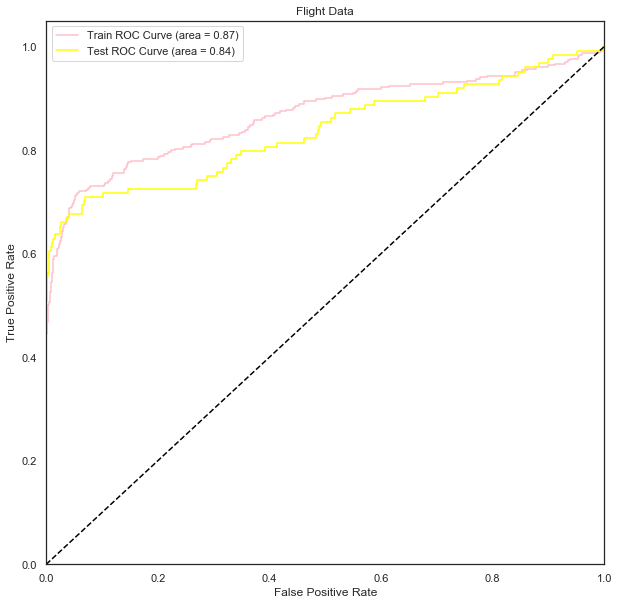

In [1521]:
# We can visualize these ROC curves with matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train_r, x_train['predictions_s'],pos_label=1.0)[0],roc_curve(y_train_r, x_train['predictions_s'],pos_label=1.0)[1], 
         color = 'pink', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train_r, x_train['predictions_s']))

plt.plot(roc_curve(y_test, x_test['predictions_s'],pos_label=1.0)[0],roc_curve(y_test, x_test['predictions_s'],pos_label=1.0)[1], 
         color = 'yellow', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, x_test['predictions_s']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Flight Data')
plt.legend()
plt.show()

In [1522]:
x_test['resp'] = x_test['predictions_s'].map(lambda x: 1 if x > 0.5 else 0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1523]:
pd.crosstab(y_test, x_test['resp'],
            rownames=['True'],colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,537,0,537
1,69,55,124
All,606,55,661


In [1524]:
#TP=55
#TN=537
#FP=0
#FN=69

In [1525]:
#sensitivity
55/55+69

70.0

In [1526]:
#specificity
537/537+0

1.0

In [1527]:
#PPV
55/55+0

1.0

In [1528]:
#NPV
537/537+69

70.0

In [1529]:
#precision
537/(537+69)

0.8861386138613861

In [1530]:
from sklearn import neighbors
knn_clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')

In [1531]:
knn_model = knn_clf.fit(x_train_vars_only_s, y_train)

In [1532]:
knn_model = knn_clf.fit(x_train_vars_only_s, y_train)

In [1533]:
knn_model.score(x_train_vars_only_s, y_train)

0.8863636363636364

In [1534]:
knn_model.score(x_test_vars_only_s, y_test)

0.7957639939485628

In [1535]:
knn_probs_train = knn_model.predict_proba(x_train_vars_only_s)
knn_probs_test = knn_model.predict_proba(x_test_vars_only_s)
knn_probs_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [1536]:
x_train['KNN_PROBS'] = knn_probs_train[:, 1]
x_test['KNN_PROBS'] = knn_probs_test[:, 1]
x_test['KNN_PREDS'] = knn_model.predict(x_test_vars_only_s)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [1537]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train['KNN_PROBS'],pos_label=1.0)
metrics.auc(fpr, tpr)

0.9321572666496338

In [1538]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test['KNN_PROBS'],pos_label=1.0)
metrics.auc(fpr, tpr)

0.650560160989968

In [1539]:
sns.set(style='white', rc={'figure.figsize':(10,10)})

In [1540]:
y_test_r = y_test

In [1541]:
y_pred_prob_train = x_test['KNN_PROBS']

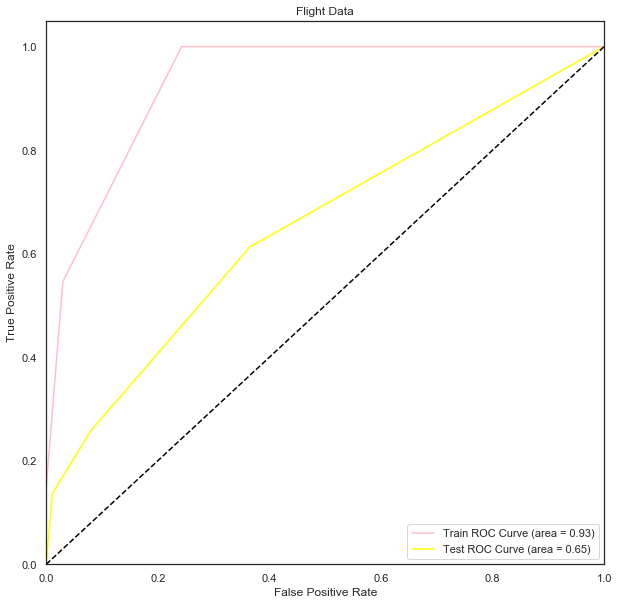

In [1542]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train_r, x_train['KNN_PROBS'],pos_label=1.0)[0],roc_curve(y_train_r, x_train['KNN_PROBS'],pos_label=1.0)[1], 
         color = 'pink', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train_r, x_train['KNN_PROBS']))

plt.plot(roc_curve(y_test, x_test['KNN_PROBS'],pos_label=1.0)[0],roc_curve(y_test, x_test['KNN_PROBS'],pos_label=1.0)[1], 
         color = 'yellow', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, x_test['KNN_PROBS']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Flight Data')
plt.legend()
plt.show()